In [1]:
# 导入常用模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. 给脸

In [2]:
# 网络请求模块
import requests

In [ ]:
# 百度AI开放平台参数
# 访问ai.baidu.com自行申请账号（免费）
client_id =
client_secret =  

In [3]:
host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id={}&client_secret={}'.format(client_id, client_secret)

In [4]:
# 获取API token
token_r = requests.post(host, headers={'Content-Type':'application/json'})

In [5]:
token_r.json()

{'access_token': '24.3db10a160f53c837fafb882e57246a4f.2592000.1531237568.282335-11376865',
 'session_key': '9mzdCKD3UUFSkwdxjtwe3/cEuRkv8udujxCuIUlQzcg1MG4HoxPwizViBUklHt0J/3rEbf9KEtEo7LayMuVoADmnrodmZw==',
 'scope': 'public brain_all_scope vis-faceverify_faceverify_h5-face-liveness vis-faceverify_FACE_V3 wise_adapt lebo_resource_base lightservice_public hetu_basic lightcms_map_poi kaidian_kaidian ApsMisTest_Test权限 vis-classify_flower lpq_开放 cop_helloScope ApsMis_fangdi_permission smartapp_snsapi_base iop_autocar',
 'refresh_token': '25.3c643144dca123b754d06f5372361421.315360000.1844005568.282335-11376865',
 'session_secret': '524c1c4ec0e87fe35aea537ff873e1f2',
 'expires_in': 2592000}

In [6]:
# 人脸识别API地址
face_base_url = 'https://aip.baidubce.com/rest/2.0/face/v3/detect'

In [7]:
url = face_base_url + '?access_token=' + token_r.json()['access_token']

In [9]:
# 试验：用一张葛优照片自动截取脑门

# 对图片进行base64编码（API要求）
import base64

with open('geyou.jpg', 'rb') as f:
    geyou = base64.b64encode(f.read())

In [10]:
# 向API发送请求，识别葛优照片
face_r = requests.post(url, headers={'Content-Type':'application/json'}, 
                       data={'image':geyou,
                             'image_type':'BASE64'})

In [11]:
# 识别结果
face_r.json()

{'error_code': 0,
 'error_msg': 'SUCCESS',
 'log_id': 2386250592,
 'timestamp': 1528645672,
 'cached': 0,
 'result': {'face_num': 1,
  'face_list': [{'face_token': '5da6f2d21ca7ad155e06fb594feba66d',
    'location': {'left': 77.47813416,
     'top': 113.414772,
     'width': 171,
     'height': 162,
     'rotation': -1},
    'face_probability': 1,
    'angle': {'yaw': -8.28107357,
     'pitch': 1.144884944,
     'roll': -2.983301163}}]}}

In [18]:
# 与脸部相关的坐标参数
face = [int(i) for i in face_r.json()['result']['face_list'][0]['location'].values()]

In [19]:
face

[77, 113, 171, 162, -1]

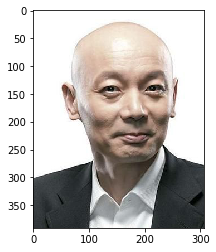

In [14]:
plt.imshow(plt.imread('geyou.jpg'))

# 1. 不要脸

In [16]:
# 读取葛优照片，转为numpy.ndarray格式
geyou_array = plt.imread('geyou.jpg')

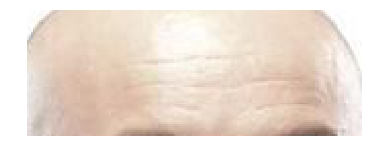

In [20]:
# 截取前额区域，另存为图片
plt.imshow(geyou_array[max(0,face[3]-face[1]):face_locs[1],face_locs[0]:face_locs[0]+face_locs[2]])
plt.axis('off')
plt.savefig('geyou_forehead.jpg')

In [21]:
# matplotlib的图片另存效果不佳，改用PIL
from PIL import Image
im = Image.fromarray(geyou_array[max(0,face[3]-face[1]):face_locs[1],face_locs[0]:face_locs[0]+face_locs[2]])
im.save('geyou_forehead.jpg')

In [22]:
# 从原始图片集中批量处理葛优和陈佩斯的照片

import os
bald_ids = {'1':'陈佩斯', '0':'葛优'}
base_dir = 'dataset/face/'

In [26]:
file_names_0 = os.listdir(base_dir + bald_ids['0'])
file_names_1 = os.listdir(base_dir + bald_ids['1'])

In [27]:
# 将“获得脸部区域”的代码写成一个函数
def get_face(file_name):
    
    with open(file_name, 'rb') as f:
        img_data = base64.b64encode(f.read())
        
    face_r = requests.post(url, headers={'Content-Type':'application/json'}, 
                           data={'image':img_data,
                           'image_type':'BASE64'})
    
    face_locs = [int(i) for i in face_r.json()['result']['face_list'][0]['location'].values()]
    
    return face_locs

In [28]:
# 将“根据脸部坐标，获取前额区域”写成一个函数
def get_forehead(img_array, face):
    
    forehead = img_array[max(0,face[1]-face[3]):face[1],face[0]:face[0]+face[2]]
    
    return forehead

In [31]:
from tqdm import tqdm
import time

In [32]:
# 批量处理葛优
for idx, img in tqdm(enumerate(file_names_0)):
    
    img_array = plt.imread(base_dir + bald_ids['0'] + '/' + img)
    
    face = get_face(base_dir + bald_ids['0'] + '/' + img)
    forehead = get_forehead(img_array, face)
    
    image = Image.fromarray(forehead).resize((50,50))
    image.save('dataset/forehead/0/' + '{}.jpg'.format(str(idx)))
    
    time.sleep(2)

51it [02:03,  2.42s/it]


In [33]:
# 批量处理陈佩斯
for idx, img in tqdm(enumerate(file_names_1)):
    
    try:
        
        img_array = plt.imread(base_dir + bald_ids['1'] + '/' + img)
    
        face = get_face(base_dir + bald_ids['1'] + '/' + img)
        forehead = get_forehead(img_array, face)

        image = Image.fromarray(forehead).resize((50,50))
        image.save('dataset/forehead/1/' + '{}.jpg'.format(str(idx)))

        time.sleep(2)
        
    except (KeyError, TypeError):
        continue    

50it [02:01,  2.44s/it]


# 2. 最终测试集

In [ ]:
# 额外搜集部分照片，用作最终测试
test_dir = 'dataset/test/'

In [ ]:
file_names_test0 = os.listdir(test_dir + '0')
file_names_test1 = os.listdir(test_dir + '1')

In [ ]:
for idx, img in tqdm(enumerate(file_names_test0)):
    
    img_array = plt.imread(test_dir + '0/' + img)
    
    face = get_face(test_dir + '0/' + img)
    forehead = get_forehead(img_array, face)
    
    image = Image.fromarray(forehead).resize((50,50))
    image.save('dataset/test/0/' + '{}.jpg'.format(str(idx)))
    
    time.sleep(2)

In [ ]:
for idx, img in tqdm(enumerate(file_names_test1)):
    
    img_array = plt.imread(test_dir + '1/' + img)
    
    face = get_face(test_dir + '1/' + img)
    forehead = get_forehead(img_array, face)
    
    image = Image.fromarray(forehead).resize((50,50))
    image.save('dataset/test/1/' + '{}.jpg'.format(str(idx)))
    
    time.sleep(2)